In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector as connector
from scipy import stats
from scipy.stats import ttest_ind, chi2_contingency

In [43]:
try:
    mydb = connector.connect(host='127.0.0.1', database='boliviah_whmcs', user='root', passwd= '', use_pure='True')
    query = """
SELECT c.id AS client_id,
       h.id AS servicio_id,
       p.name AS nombre_servicio,
       h.regdate,
       ROUND(DATEDIFF(h.nextduedate, h.regdate) / 30) AS meses_activo,
       h.domainstatus,
       h.paymentmethod,
       h.billingcycle,
       h.amount AS total,
       c.state
FROM tblusers_clients cu
JOIN tblclients c ON cu.client_id  = c.id
JOIN tblusers u ON cu.auth_user_id = u.id
JOIN tblhosting h ON c.id = h.userid
LEFT JOIN tblinvoices i ON h.id = i.userid
LEFT JOIN tblproducts p ON h.packageid = p.id;
"""
    data = pd.read_sql(query, mydb)
    mydb.close()
except Exception as e:
    mydb.close()
    print(str(e))


C:\Users\ASUS\AppData\Local\Temp\ipykernel_12504\3607035666.py:21: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data = pd.read_sql(query, mydb)


In [44]:
data.count()

client_id          1850
servicio_id        1850
nombre_servicio    1850
regdate            1850
meses_activo       1850
domainstatus       1850
paymentmethod      1850
billingcycle       1850
total              1850
state              1850
dtype: int64

In [45]:
data

,client_id,servicio_id,nombre_servicio,regdate,meses_activo,domainstatus,paymentmethod,billingcycle,total,state
0,1,196,CLOUD PLUS,2018-04-13,73.0,Active,banktransfer,Annually,99.0,Cochabamba
1,1,196,CLOUD PLUS,2018-04-13,73.0,Active,banktransfer,Annually,99.0,Cochabamba
2,1,228,SHARED TURBO XXL,2018-06-19,73.0,Active,banktransfer,Annually,99.0,Cochabamba
3,1,228,SHARED TURBO XXL,2018-06-19,73.0,Active,banktransfer,Annually,99.0,Cochabamba
4,1,228,SHARED TURBO XXL,2018-06-19,73.0,Active,banktransfer,Annually,99.0,Cochabamba
...,...,...,...,...,...,...,...,...,...,...
1845,849,975,Whats XXL,2023-10-23,12.0,Active,qr,Annually,499.0,La Paz
1846,850,977,Zoom PRO,2023-10-26,12.0,Active,banktransfer,Biennially,1543.0,Pando
1847,850,978,MOODLE X2,2023-10-26,13.0,Active,banktransfer,Annually,2490.0,Pando
1848,851,979,AUDIO PRO,2023-11-04,12.0,Active,qr,Annually,499.0,Santa Cruz


In [46]:
data.describe()

,client_id,servicio_id,meses_activo,total
count,1850.000000,1850.000000,1850.000000,1850.000000
mean,277.683784,388.116757,20.321622,343.688389
std,244.506813,260.596824,23.609584,328.005965
min,1.000000,17.000000,0.000000,99.000000
25%,82.000000,160.000000,0.000000,229.000000
50%,176.500000,323.000000,12.000000,299.000000
75%,494.000000,577.000000,24.000000,399.000000
max,852.000000,981.000000,85.000000,9980.000000


In [47]:
from scipy.stats.mstats import winsorize

# Definir las columnas de interés
columns_of_interest = ['meses_activo', 'total']

# Convertir el DataFrame a un array de NumPy antes de aplicar Winsorizing
data_array = data[columns_of_interest].to_numpy()

# Aplicar Winsorizing a las columnas seleccionadas
winsorized_data = winsorize(data_array, limits=[0.05, 0.05], axis=0)

# Reemplazar las columnas originales en el DataFrame con las versiones Winsorizadas
data[columns_of_interest] = winsorized_data

# Ahora, los valores atípicos han sido ajustados dentro de los límites del percentil 5 al 95%.


In [48]:

data['meses_activo'] = data['meses_activo'].replace({0: 1})

In [49]:
data

,client_id,servicio_id,nombre_servicio,regdate,meses_activo,domainstatus,paymentmethod,billingcycle,total,state
0,1,196,CLOUD PLUS,2018-04-13,73.0,Active,banktransfer,Annually,99.0,Cochabamba
1,1,196,CLOUD PLUS,2018-04-13,73.0,Active,banktransfer,Annually,99.0,Cochabamba
2,1,228,SHARED TURBO XXL,2018-06-19,73.0,Active,banktransfer,Annually,99.0,Cochabamba
3,1,228,SHARED TURBO XXL,2018-06-19,73.0,Active,banktransfer,Annually,99.0,Cochabamba
4,1,228,SHARED TURBO XXL,2018-06-19,73.0,Active,banktransfer,Annually,99.0,Cochabamba
...,...,...,...,...,...,...,...,...,...,...
1845,849,975,Whats XXL,2023-10-23,12.0,Active,qr,Annually,499.0,La Paz
1846,850,977,Zoom PRO,2023-10-26,12.0,Active,banktransfer,Biennially,620.0,Pando
1847,850,978,MOODLE X2,2023-10-26,13.0,Active,banktransfer,Annually,620.0,Pando
1848,851,979,AUDIO PRO,2023-11-04,12.0,Active,qr,Annually,499.0,Santa Cruz




- obserbacion se puede observar que por parte de la columna total existe datos negativos los cuales pueden ser datos atipicos, por otra parte el valor minimo de meses activo es 0 esto puede ser a que existe usuarios que cancelarion su servicio al mes de contratar el servicio

In [50]:
def grafica_variable(variable):
    df_real[variable].hist()
    plt.show()

## Descripcion estadistica y visualizacion univariado

In [51]:
data[['meses_activo','total']].describe()

,meses_activo,total
count,1850.000000,1850.000000
mean,20.463784,318.868497
std,23.051569,153.111407
min,1.000000,99.000000
25%,1.000000,229.000000
50%,12.000000,299.000000
75%,24.000000,399.000000
max,73.000000,620.000000


In [52]:

media = np.mean(data['meses_activo'])
print(f"Media: {media}")

mediana = np.median(data['meses_activo'])
print(f"Mediana: {mediana}")

moda = stats.mode(data['meses_activo'])
print(f"Moda: {moda}")

percentil_25 = np.percentile(data['meses_activo'], 25)
percentil_50 = np.percentile(data['meses_activo'], 50)
percentil_75 = np.percentile(data['meses_activo'], 75)
print(f"Percentil 25: {percentil_25}")
print(f"Percentil 50 (Mediana): {percentil_50}")
print(f"Percentil 75: {percentil_75}")

rango = np.ptp(data['meses_activo'])

print(f"Rango: {rango}")

Media: 20.463783783783782
Mediana: 12.0
Moda: ModeResult(mode=12.0, count=682)
Percentil 25: 1.0
Percentil 50 (Mediana): 12.0
Percentil 75: 24.0
Rango: 72.0


In [53]:
rango = np.max(data['meses_activo']) - np.min(data['meses_activo'])
print(f"Rango: {rango}")

# Calcular el rango intercuartil (IQR)
Q1 = np.percentile(data['meses_activo'], 25)
Q3 = np.percentile(data['meses_activo'], 75)
IQR = Q3 - Q1
print(f"Rango Intercuartil (IQR): {IQR}")

# Calcular la varianza
varianza = np.var(data['meses_activo'])
print(f"Varianza: {varianza}")

# Calcular la desviación estándar
desviacion_estandar = np.std(data['meses_activo'])
print(f"Desviación Estándar: {desviacion_estandar}")

Rango: 72.0
Rango Intercuartil (IQR): 23.0
Varianza: 531.0876073045906
Desviación Estándar: 23.045338081802807


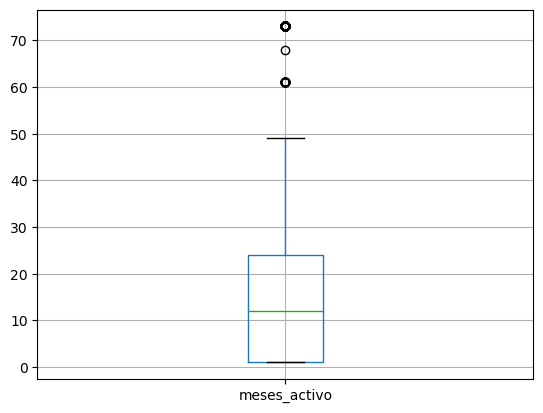

In [54]:
data.boxplot('meses_activo')
plt.show()

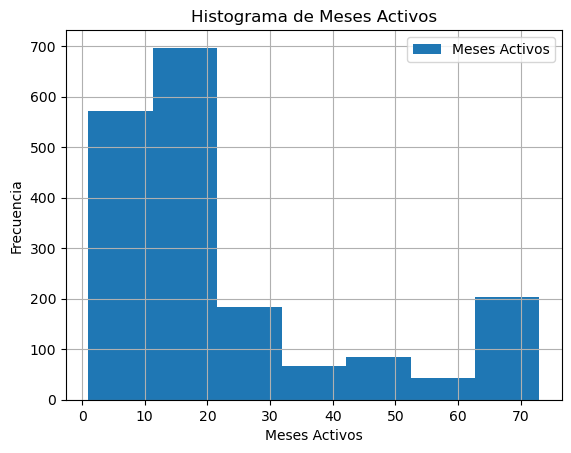

In [55]:
data['meses_activo'].hist(bins=7)
plt.xlabel('Meses Activos')
plt.ylabel('Frecuencia')
plt.title('Histograma de Meses Activos')
plt.legend(['Meses Activos'])
plt.show()

### Estadísticas y graficas de tendencia central, dispersión varriable 

In [56]:
media = np.mean(data['total'])
print(f"Media: {media}")

mediana = np.median(data['total'])
print(f"Mediana: {mediana}")

moda = stats.mode(data['total'])
print(f"Moda: {moda}")

percentil_25 = np.percentile(data['total'], 25)
percentil_50 = np.percentile(data['total'], 50)
percentil_75 = np.percentile(data['total'], 75)
print(f"Percentil 25: {percentil_25}")
print(f"Percentil 50 (Mediana): {percentil_50}")
print(f"Percentil 75: {percentil_75}")

rango = np.ptp(data['total'])

print(f"Rango: {rango}")

Media: 318.86849729729727
Mediana: 299.0
Moda: ModeResult(mode=299.0, count=567)
Percentil 25: 229.0
Percentil 50 (Mediana): 299.0
Percentil 75: 399.0
Rango: 521.0


In [57]:
rango = np.max(data['total']) - np.min(data['total'])
print(f"Rango: {rango}")

# Calcular el rango intercuartil (IQR)
Q1 = np.percentile(data['total'], 25)
Q3 = np.percentile(data['total'], 75)
IQR = Q3 - Q1
print(f"Rango Intercuartil (IQR): {IQR}")

# Calcular la varianza
varianza = np.var(data['total'])
print(f"Varianza: {varianza}")

# Calcular la desviación estándar
desviacion_estandar = np.std(data['total'])
print(f"Desviación Estándar: {desviacion_estandar}")

Rango: 521.0
Rango Intercuartil (IQR): 170.0
Varianza: 23430.43102130934
Desviación Estándar: 153.07001999512948


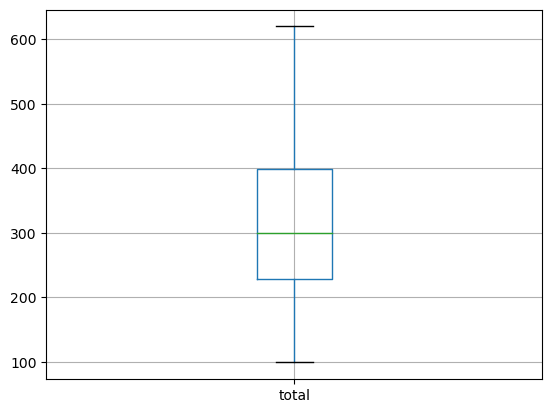

In [58]:
data.boxplot('total')
plt.show()

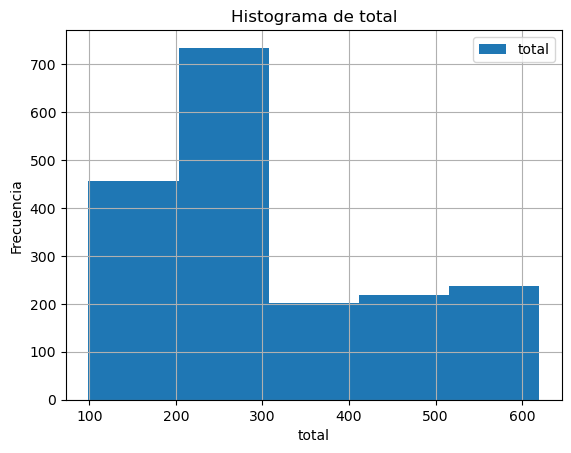

In [59]:
data['total'].hist(bins=5)
plt.xlabel('total')
plt.ylabel('Frecuencia')
plt.title('Histograma de total')
plt.legend(['total'])
plt.show()

In [60]:
ciudad_agrupado = data.groupby('state').size()
ciudad_agrupado

state
Beni           79
Chuquisaca     44
Cochabamba    419
La Paz        582
Oruro          78
Pando          13
Potosí         78
Santa Cruz    439
Tarija        118
dtype: int64

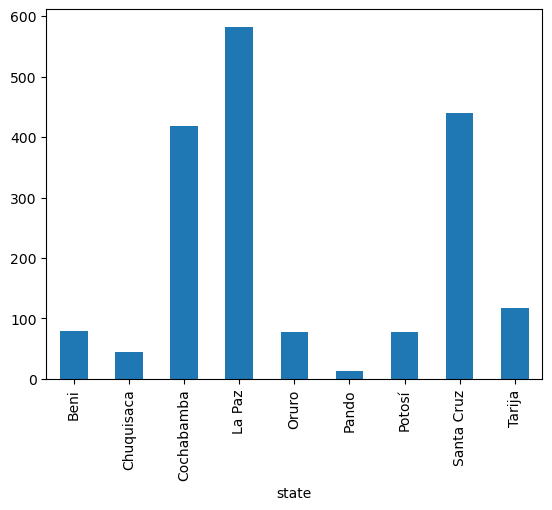

In [61]:
ciudad_agrupado.plot.bar('state')
plt.show()

In [62]:
status_agrupado = data.groupby('nombre_servicio').size()

In [63]:
status_agrupado

nombre_servicio
#Hola2018                       8
AUDIO DEALER                   17
AUDIO PLUS                     31
AUDIO PRO                      76
BLACK SHEEP CLOUD               1
                               ..
Windows VPS XXL                 1
Wordpress en Shared Hosting     1
Zoom PRO                        1
eLearning PRO                   6
¡Digitalízate o muere!          1
Length: 87, dtype: int64

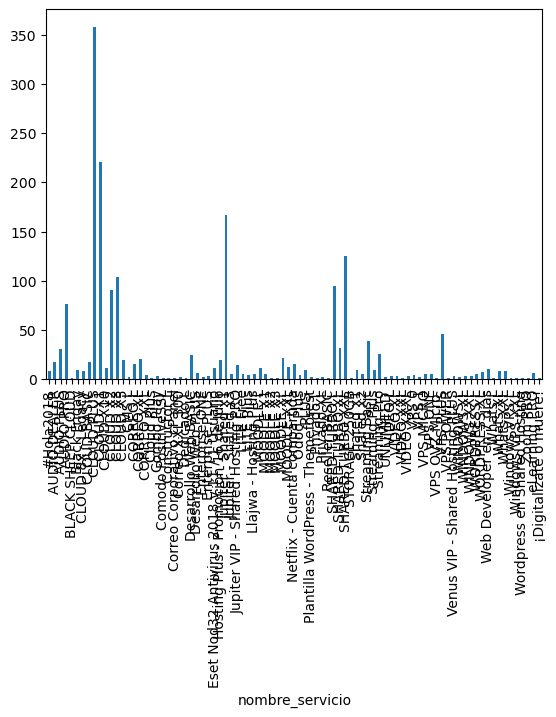

In [64]:

status_agrupado.plot.bar('nombre_servicio')
plt.show()

- domainstatus

In [65]:
frequency_agrupado = data.groupby('domainstatus').size()

In [66]:
frequency_agrupado

domainstatus
Active        539
Cancelled      50
Pending       517
Suspended     387
Terminated    357
dtype: int64

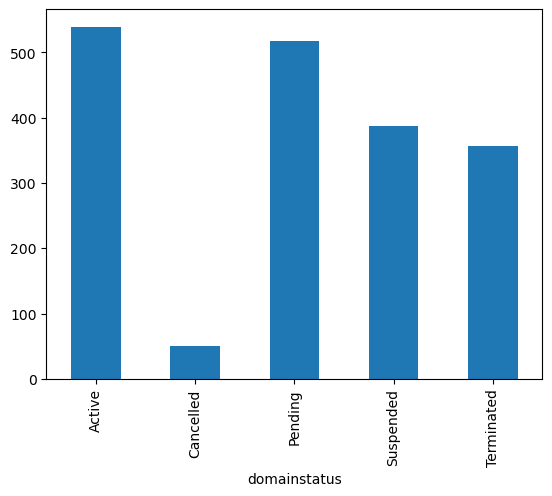

In [67]:
frequency_agrupado.plot.bar('domainstatus')
plt.show()

- status

In [68]:
name_agrupado = data.groupby('paymentmethod').size()

In [69]:
name_agrupado

paymentmethod
banktransfer    723
paypal          408
qr              578
walletbo        141
dtype: int64

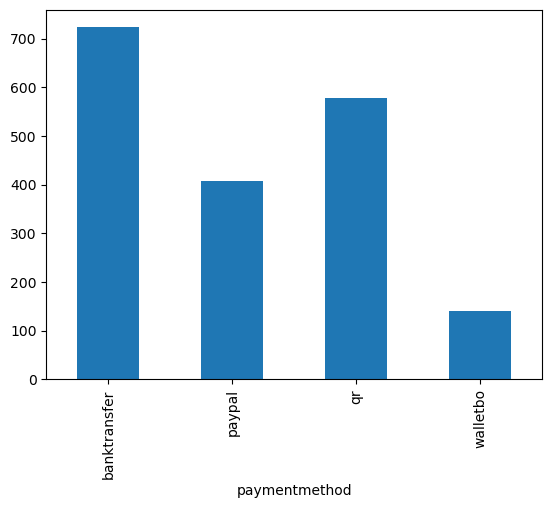

In [70]:
name_agrupado.plot.bar('paymentmethod')
plt.show()

In [71]:
name_agrupado = data.groupby('billingcycle').size()

In [72]:
name_agrupado

billingcycle
Annually         1525
Biennially         20
Free Account        5
Monthly           214
One Time           24
Quarterly          47
Semi-Annually       4
Triennially        11
dtype: int64

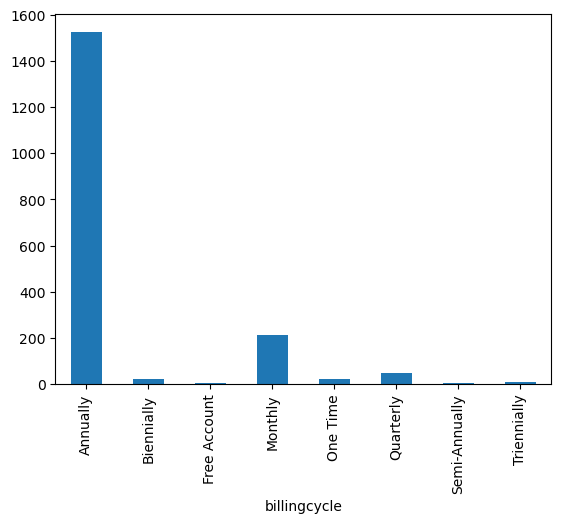

In [73]:
name_agrupado.plot.bar('billingcycle')
plt.show()

## Visualizacion Bivariado


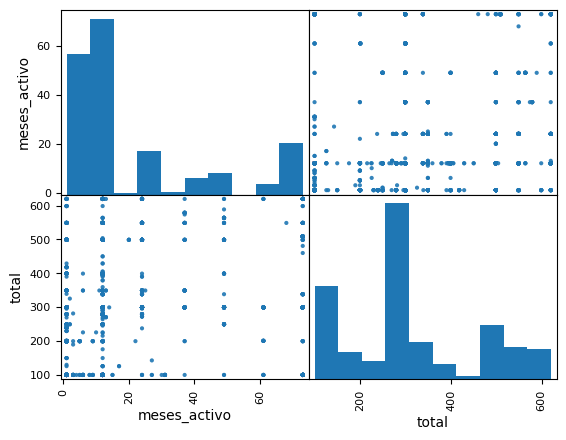

In [74]:
pd.plotting.scatter_matrix(data[['meses_activo','total']], alpha=0.9)
plt.show()

### Prueva chi cuadrado para las variables cualitativas con realcion a la variable objetivo 

In [75]:

# Ejemplo de datos
data_variable1 = data['meses_activo']
data_variable2 = data['total']

# Crear la tabla de contingencia
observed_data = pd.crosstab(data_variable1, data_variable2)

# Imprimir la tabla de contingencia
print("Tabla de Contingencia:")
print(observed_data)

# Realizar la prueba de Chi-cuadrado
chi2, p, dof, expected = chi2_contingency(observed_data)

# Imprimir los resultados
print(f"\nEstadístico Chi-cuadrado: {chi2}")
print(f"P-valor: {p}")
print(f"Grados de libertad: {dof}")
print("\nFrecuencias esperadas:")
print(expected)


Tabla de Contingencia:
total         99.00   125.00  129.00  142.00  149.00  175.00  189.00  199.00  \
meses_activo                                                                   
1.0              117       1       1       0       4       0       0      50   
2.0                0       0       0       0       0       0       0       0   
3.0               10       0       0       0       0       0       1       1   
4.0                1       0       0       0       0       0       0       0   
5.0                2       0       0       0       0       0       0       8   
6.0               10       0       0       0       0       0       0       0   
8.0                2       0       0       0       0       0       0       0   
9.0                4       0       0       0       0       0       0       4   
10.0               0       0       0       0       0       0       0       0   
11.0               0       0       0       0       0       0       0       0   
12.0             

In [76]:



# Ejemplo de datos
data_variable1 = data['domainstatus']
data_variable2 = data['nombre_servicio']

# Crear la tabla de contingencia
observed_data = pd.crosstab(data_variable1, data_variable2)

# Imprimir la tabla de contingencia
print("Tabla de Contingencia:")
print(observed_data)

# Realizar la prueba de Chi-cuadrado
chi2, p, dof, expected = chi2_contingency(observed_data)

# Imprimir los resultados
print(f"\nEstadístico Chi-cuadrado: {chi2}")
print(f"P-valor: {p}")
print(f"Grados de libertad: {dof}")
print("\nFrecuencias esperadas:")
print(expected)



Tabla de Contingencia:
nombre_servicio  #Hola2018  AUDIO DEALER  AUDIO PLUS  AUDIO PRO  \
domainstatus                                                      
Active                   0             1           4         28   
Cancelled                3             0           1          1   
Pending                  0             3          12         15   
Suspended                4            12           9         21   
Terminated               1             1           5         11   

nombre_servicio  BLACK SHEEP CLOUD  Black Friday  CLOUD 8x - Legacy  \
domainstatus                                                          
Active                           0             0                  8   
Cancelled                        0             0                  0   
Pending                          0             9                  0   
Suspended                        0             0                  0   
Terminated                       1             0                  0   

nombre_se

In [77]:
import numpy as np
import pandas as pd
from scipy.stats import chi2_contingency

# Ejemplo de datos
data_variable1 = data['domainstatus']
data_variable2 = data['paymentmethod']

# Crear la tabla de contingencia
observed_data = pd.crosstab(data_variable1, data_variable2)

# Imprimir la tabla de contingencia
print("Tabla de Contingencia:")
print(observed_data)

# Realizar la prueba de Chi-cuadrado
chi2, p, dof, expected = chi2_contingency(observed_data)

# Imprimir los resultados
print(f"\nEstadístico Chi-cuadrado: {chi2}")
print(f"P-valor: {p}")
print(f"Grados de libertad: {dof}")
print("\nFrecuencias esperadas:")
print(expected)

Tabla de Contingencia:
paymentmethod  banktransfer  paypal   qr  walletbo
domainstatus                                      
Active                  194     104  212        29
Cancelled                24       8   15         3
Pending                 194     126  133        64
Suspended               161     109  105        12
Terminated              150      61  113        33

Estadístico Chi-cuadrado: 67.72080537056128
P-valor: 8.528459554454841e-10
Grados de libertad: 12

Frecuencias esperadas:
[[210.64702703 118.87135135 168.40108108  41.08054054]
 [ 19.54054054  11.02702703  15.62162162   3.81081081]
 [202.04918919 114.01945946 161.52756757  39.40378378]
 [151.24378378  85.34918919 120.91135135  29.49567568]
 [139.51945946  78.73297297 111.53837838  27.20918919]]


In [78]:

# Ejemplo de datos
data_variable1 = data['domainstatus']
data_variable2 = data['billingcycle']

# Crear la tabla de contingencia
observed_data = pd.crosstab(data_variable1, data_variable2)

# Imprimir la tabla de contingencia
print("Tabla de Contingencia:")
print(observed_data)

# Realizar la prueba de Chi-cuadrado
chi2, p, dof, expected = chi2_contingency(observed_data)

# Imprimir los resultados
print(f"\nEstadístico Chi-cuadrado: {chi2}")
print(f"P-valor: {p}")
print(f"Grados de libertad: {dof}")
print("\nFrecuencias esperadas:")
print(expected)

Tabla de Contingencia:
billingcycle  Annually  Biennially  Free Account  Monthly  One Time  \
domainstatus                                                          
Active             475          14             0       27         0   
Cancelled           36           0             0       11         2   
Pending            366           3             5      111        19   
Suspended          319           1             0       47         0   
Terminated         329           2             0       18         3   

billingcycle  Quarterly  Semi-Annually  Triennially  
domainstatus                                         
Active               11              2           10  
Cancelled             1              0            0  
Pending              13              0            0  
Suspended            19              0            1  
Terminated            3              2            0  

Estadístico Chi-cuadrado: 202.9966405545492
P-valor: 1.855008243249217e-28
Grados de libertad: 28

F

In [79]:

# Ejemplo de datos
data_variable1 = data['domainstatus']
data_variable2 = data['state']

# Crear la tabla de contingencia
observed_data = pd.crosstab(data_variable1, data_variable2)

# Imprimir la tabla de contingencia
print("Tabla de Contingencia:")
print(observed_data)

# Realizar la prueba de Chi-cuadrado
chi2, p, dof, expected = chi2_contingency(observed_data)

# Imprimir los resultados
print(f"\nEstadístico Chi-cuadrado: {chi2}")
print(f"P-valor: {p}")
print(f"Grados de libertad: {dof}")
print("\nFrecuencias esperadas:")
print(expected)

Tabla de Contingencia:
state         Beni  Chuquisaca  Cochabamba  La Paz  Oruro  Pando  Potosí  \
domainstatus                                                               
Active           5           5         112     185     30     11      36   
Cancelled        0           0           2      20      0      0       2   
Pending         33          13         136     170      6      2      25   
Suspended       29          21         108     104     25      0       8   
Terminated      12           5          61     103     17      0       7   

state         Santa Cruz  Tarija  
domainstatus                      
Active               109      46  
Cancelled             15      11  
Pending              120      12  
Suspended             91       1  
Terminated           104      48  

Estadístico Chi-cuadrado: 234.4576660578237
P-valor: 1.1642153736640864e-32
Grados de libertad: 32

Frecuencias esperadas:
[[ 23.01675676  12.81945946 122.07621622 169.56648649  22.72540541
    3.78

## Analisis de correlacion



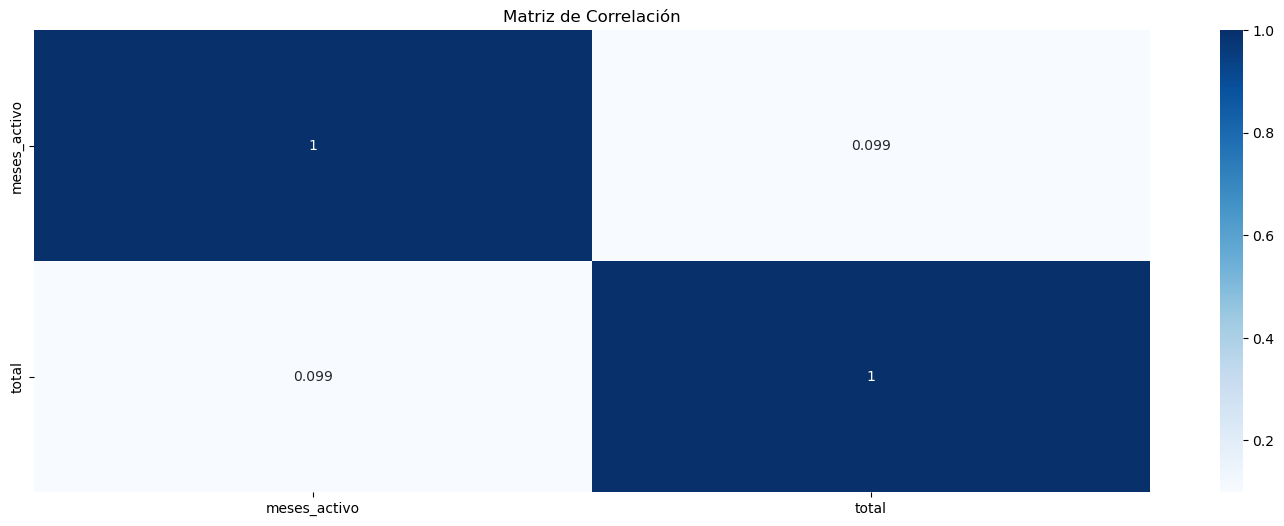

In [100]:
corr_df = data[['meses_activo','total']].corr(method='pearson')

custom_cmap = sns.color_palette("Blues", as_cmap=True)

# Crear el mapa de calor con el color personalizado
plt.figure(figsize=(18, 6))
sns.heatmap(corr_df, annot=True, cmap=custom_cmap)
plt.title('Matriz de Correlación')
plt.show()

In [41]:
data.columns
data_encoded = pd.get_dummies(data, columns=['nombre_servicio','paymentmethod', 'billingcycle','state'])
data=data_encoded
data

,client_id,servicio_id,regdate,meses_activo,domainstatus,total,nombre_servicio_#Hola2018,nombre_servicio_AUDIO DEALER,nombre_servicio_AUDIO PLUS,nombre_servicio_AUDIO PRO,...,billingcycle_Triennially,state_Beni,state_Chuquisaca,state_Cochabamba,state_La Paz,state_Oruro,state_Pando,state_Potosí,state_Santa Cruz,state_Tarija
0,1,196,2018-04-13,73.0,Active,99.0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,1,196,2018-04-13,73.0,Active,99.0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1,228,2018-06-19,73.0,Active,99.0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,1,228,2018-06-19,73.0,Active,99.0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1,228,2018-06-19,73.0,Active,99.0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1845,849,975,2023-10-23,12.0,Active,499.0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1846,850,977,2023-10-26,12.0,Active,620.0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1847,850,978,2023-10-26,13.0,Active,620.0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1848,851,979,2023-11-04,12.0,Active,499.0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0


In [263]:
data.describe()

,client_id,servicio_id,meses_activo,total,nombre_servicio_#Hola2018,nombre_servicio_AUDIO DEALER,nombre_servicio_AUDIO PLUS,nombre_servicio_AUDIO PRO,nombre_servicio_BLACK SHEEP CLOUD,nombre_servicio_Black Friday,...,billingcycle_Triennially,state_Beni,state_Chuquisaca,state_Cochabamba,state_La Paz,state_Oruro,state_Pando,state_Potosí,state_Santa Cruz,state_Tarija
count,1850.000000,1850.000000,1850.000000,1850.000000,1850.000000,1850.000000,1850.000000,1850.000000,1850.000000,1850.000000,...,1850.000000,1850.000000,1850.000000,1850.000000,1850.000000,1850.000000,1850.000000,1850.000000,1850.000000,1850.000000
mean,277.683784,388.116757,20.463784,318.868497,0.004324,0.009189,0.016757,0.041081,0.000541,0.004865,...,0.005946,0.042703,0.023784,0.226486,0.314595,0.042162,0.007027,0.042162,0.237297,0.063784
std,244.506813,260.596824,23.051569,153.111407,0.065635,0.095445,0.128393,0.198531,0.023250,0.069598,...,0.076901,0.202241,0.152416,0.418671,0.464480,0.201013,0.083555,0.201013,0.425541,0.244433
min,1.000000,17.000000,1.000000,99.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,82.000000,160.000000,1.000000,229.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,176.500000,323.000000,12.000000,299.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,494.000000,577.000000,24.000000,399.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,852.000000,981.000000,73.000000,620.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [264]:
null_values = data.isnull().sum()
null_values

client_id           0
servicio_id         0
regdate             0
meses_activo        0
domainstatus        0
                   ..
state_Oruro         0
state_Pando         0
state_Potosí        0
state_Santa Cruz    0
state_Tarija        0
Length: 114, dtype: int64

In [265]:
data.to_csv("data_readyboliviahost.csv", index=False)